<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

# setting the seed
rng.current = 1
rng_bad.current = 1

In [38]:
samples = [rng() for _ in range(1000)]
random = [rng_bad() for _ in range(1000)]

### Problem 1
Implement serial test and apply to a `samples`

In [25]:
def split_into_pairs(sequence):
    # Разбиваем последовательность на 2 мерные вектора
    n= len(sequence) // 2
    return sequence[:n * 2].reshape(-1, 2)

def create_contingency_table(pairs, bins=20):
    # Создаем таблицу сопряженности для пар точек
    x = [p[0] for p in pairs]
    y = [p[1] for p in pairs]
    H = np.histogram2d(x, y, bins=bins)[0]
    return H

k = 20
pairs = split_pairs(samples)
contingency_table = create_contingency_table(pairs, k)

# Создаем ожидаемые результаты с учетом общей суммы наблюдений
total_observations = contingency_table.sum()
f_exp = np.full((k, k), total_observations / (k*k))

chi2, p_value = stats.chisquare(contingency_table.flatten(), f_exp.flatten())

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square statistic: 375.2
P-value: 0.7984643686734986


**p-value**>0.05 => нет оснований отвергать гипотезу о равномерном распределении

### Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [40]:
def pearson_test(samples):
    k = 10
    f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
    f_exp = np.full(k, len(samples) // k)
    return stats.chisquare(f_obs, f_exp)

rng_bad_numbers = [rng_bad() for _ in range(30000)]
rng_numbers = [rng() for _ in range(30000)]
print("rng_bad:", pearson_test(rng_bad_numbers))
print("rng:", pearson_test(rng_numbers))

rng_bad: Power_divergenceResult(statistic=15.913999999999998, pvalue=0.06869935703151107)
rng: Power_divergenceResult(statistic=11.147333333333334, pvalue=0.2657450735468714)


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

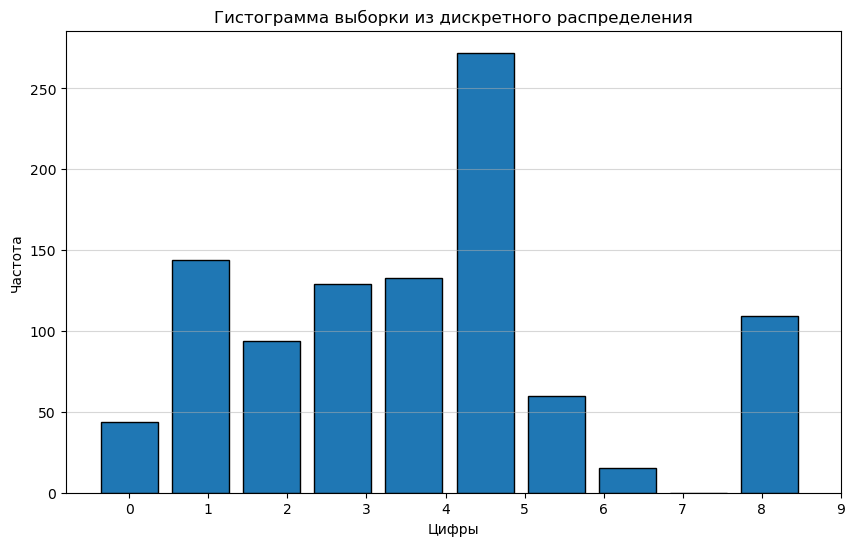

In [42]:
digits = np.arange(10)  # Цифры от 0 до 9
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
sample_size = 1000

# Сортируем веса и цифры в порядке убывания весов
sorted_indices = np.argsort(weights)[::-1]
sorted_weights = weights[sorted_indices]
sorted_digits = digits[sorted_indices]

# Нормируем веса (сумма должна быть равна 1)
normalized_weights = sorted_weights / np.sum(sorted_weights)

# Генерируем выборку
sample = np.random.choice(sorted_digits, size=sample_size, p=normalized_weights)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=10, edgecolor='black', align='left', rwidth=0.8)
plt.xticks(digits)
plt.xlabel('Цифры')
plt.ylabel('Частота')
plt.title('Гистограмма выборки из дискретного распределения')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

### Экспоненциальное распределение

Экспоненциальное распределение описывается следующими функциями:

**Функция плотности вероятности (PDF):**
$ f(x) = \lambda e^{-\lambda x} \quad \text{для } x \geq 0 $

**Функция распределения (CDF):**
$ F(x) = 1 - e^{-\lambda x} $

**Метод обратного преобразования:**
Если случайная величина $ U $ имеет равномерное распределение на интервале $(0,1)$:
$ U \sim \text{Uniform}(0,1) $

Тогда случайная величина $ X $ полученная преобразованием:
$X = F^{-1}(U) = -\frac{\ln(1 - U)}{\lambda} $

будет иметь экспоненциальное распределение с параметром $ \lambda $.

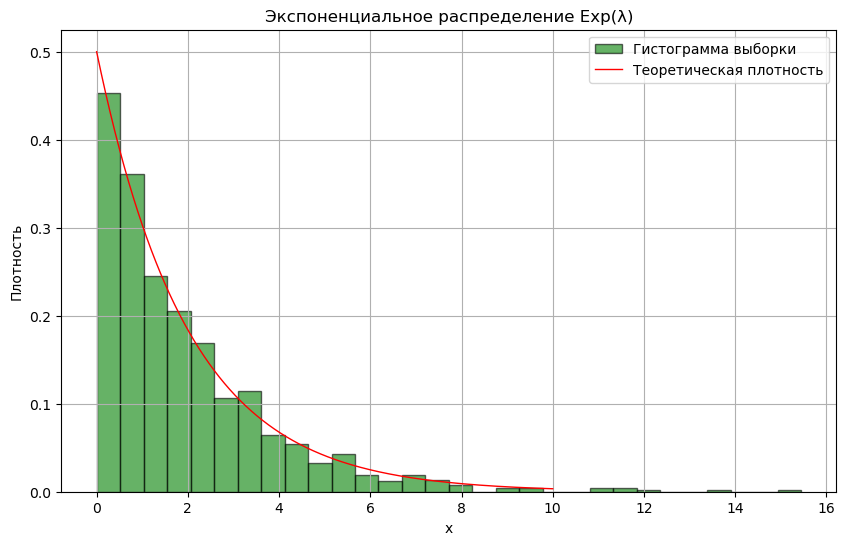

In [54]:
from scipy.stats import expon

lambda_ = 0.5  # Параметр λ 
sample_size = 1000

uniform_sample = np.random.uniform(0, 1, sample_size)  # Равномерная выборка из [0, 1)
exp_sample = -np.log(1 - uniform_sample) / lambda_     # Применяем обратную CDF

# Гистограмма выборки
plt.figure(figsize=(10, 6))
plt.hist(exp_sample, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Гистограмма выборки')

# Точная плотность распределения
x = np.linspace(0, 10, 1000)
pdf = lambda_ * np.exp(-lambda_ * x)  # Плотность Exp(λ): f(x) = λe^{-λx}
plt.plot(x, pdf, 'r-', lw=1, label='Теоретическая плотность')

# Оформление
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Экспоненциальное распределение Exp(λ)')
plt.legend()
plt.grid(True)
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

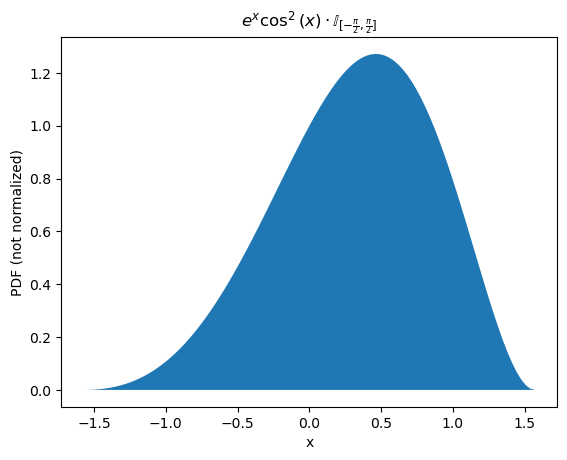

In [68]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

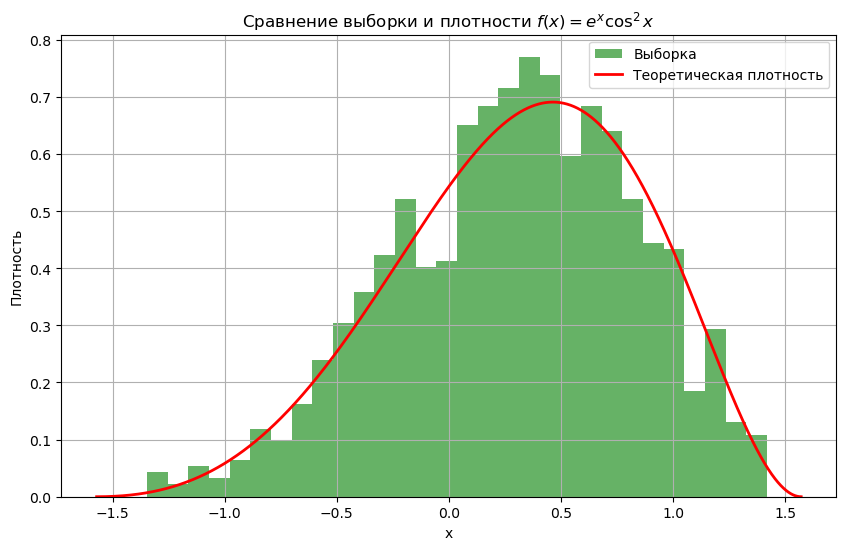

In [132]:
from scipy.optimize import minimize_scalar
from scipy.integrate import quad

def f(x):
    return np.exp(x) * (np.cos(x))**2

res = minimize_scalar(lambda x: -f(x), bounds=(-np.pi/2, np.pi/2), method='bounded')
M = f(res.x)*np.pi

#Посчитаем нормирующую константу
C, error = quad(lambda x: np.exp(x) * (np.cos(x))**2, -np.pi/2, np.pi/2)

def accept_reject(sample_size):
    samples = []
    while len(samples) < sample_size:
        x = np.random.uniform(-np.pi/2, np.pi/2)
        u = np.random.rand()
        if u <= f(x) / (M*np.pi):
            samples.append(x)
    return np.array(samples)

samples = accept_reject(1000)

x_vals = np.linspace(-np.pi/2, np.pi/2, 1000)
f_vals = f(x_vals)/C # Нормировка

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Выборка')
plt.plot(x_vals, f_vals, 'r-', lw=2, label='Теоретическая плотность')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title(r'Сравнение выборки и плотности $f(x) = e^x \cos^2 x$')
plt.legend()
plt.grid()
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

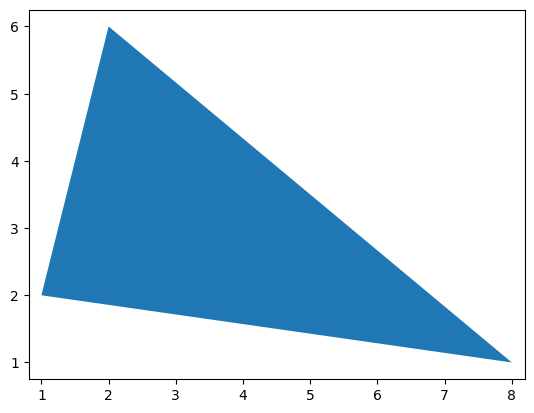

In [22]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

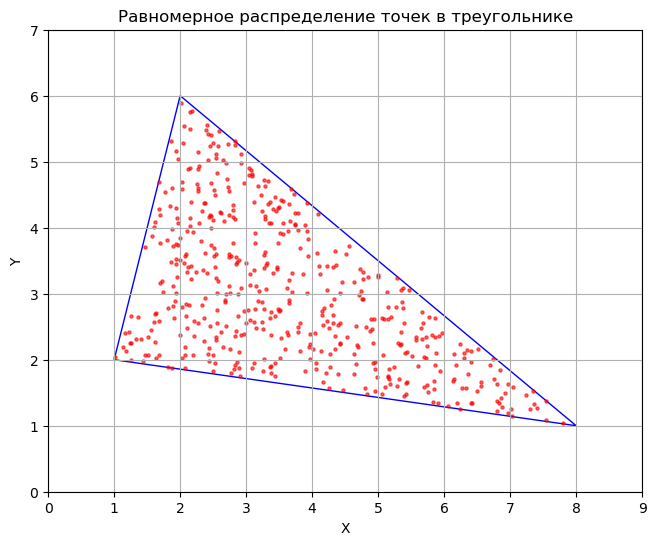

In [134]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Вершины треугольника
vertices = np.array([[1, 2], [2, 6], [8, 1]])
A, B, C = vertices

# Генерация 500 точек
n_points = 500
u = np.random.rand(n_points)
v = np.random.rand(n_points)

# Фильтрация точек вне треугольника(отражение)
mask = u + v > 1
u[mask] = 1 - u[mask]
v[mask] = 1 - v[mask]

# Преобразование в декартовы координаты
points = A + u[:, np.newaxis] * (B - A) + v[:, np.newaxis] * (C - A)

# Визуализация
fig, ax = plt.subplots(figsize=(8, 6))
polygon = Polygon(vertices, closed=True, fill=False, edgecolor='blue')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=5, color='red', alpha=0.6)

# Настройка графика
ax.set_xlim(0, 9)
ax.set_ylim(0, 7)
ax.set_aspect('equal')
ax.grid(True)
plt.title('Равномерное распределение точек в треугольнике')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

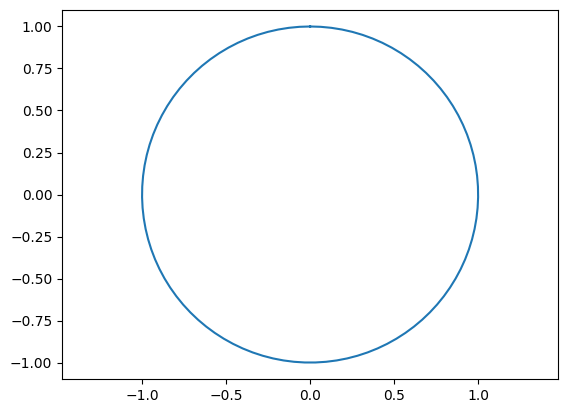

In [25]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

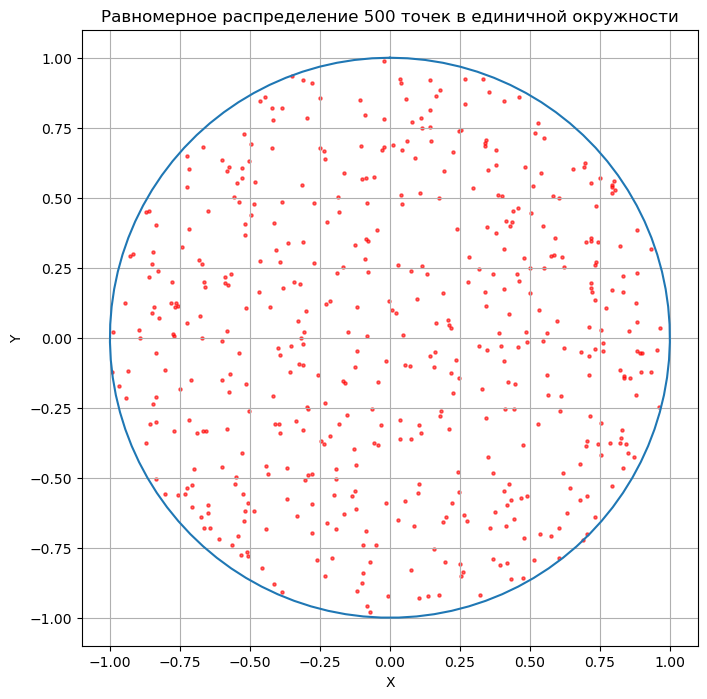

In [143]:
# Параметры
n_points = 500

# Генерация точек
theta = 2 * np.pi * np.random.rand(n_points)  # Равномерное распределение углов
r = np.sqrt(np.random.rand(n_points))         # Коррекция распределения радиусов

# Преобразование в декартовы координаты
x = r * np.cos(theta)
y = r * np.sin(theta)

# Визуализация
fig, ax = plt.subplots(figsize=(8, 8))

# Окружность
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))

# Точки
ax.scatter(x, y, s=5, color='red', alpha=0.6)

# Настройки графика
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.grid(True)
plt.title('Равномерное распределение 500 точек в единичной окружности')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [151]:
import seaborn as sns

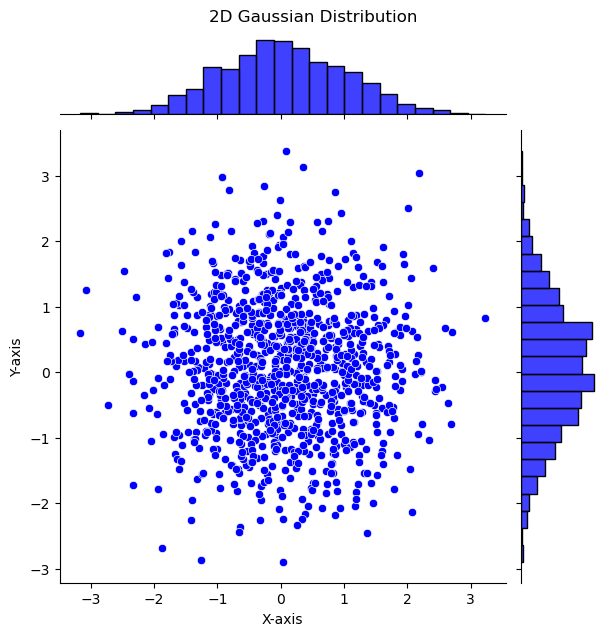

In [153]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

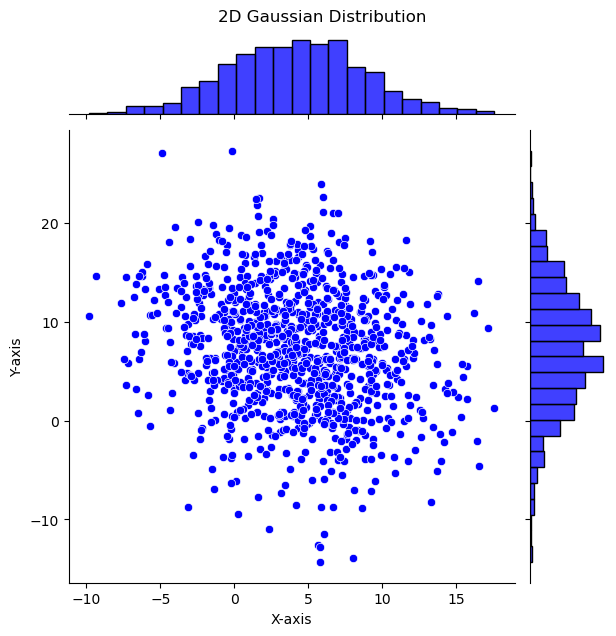

Выборочное среднее:
 [4.11112895 7.20586866]
Теоретическое среднее:
 [4 7]
Выборочная ковариационная матрица:
 [[21.70277494 -5.70744159]
 [-5.70744159 38.31977699]]
Теоретическая ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [167]:
n = 1000
mu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

# Разложение Холецкого для ковариационной матрицы
Sigma = np.linalg.cholesky(sigma)

# Модифицированный метод Бокса-Мюллера
z = np.zeros((n, 2))
count = 0
while count < n:
     u1, u2 = np.random.uniform(-1, 1, 2)
     s = u1**2 + u2**2
     if s <= 1 and s!=0:
         z[count, 0] = u1 * np.sqrt(-2 * np.log(s) / s)
         z[count, 1] = u2 * np.sqrt(-2 * np.log(s) / s)
         count += 1
         
# Преобразуем в заданное распределение
x = mu + np.dot(z, Sigma)

joint_plot = sns.jointplot(x=x[:, 0], y=x[:, 1], color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

# Сравнение с теоретическими значениями
print("Выборочное среднее:\n", np.mean(x, axis=0))
print("Теоретическое среднее:\n", mu)
print("Выборочная ковариационная матрица:\n", np.cov(x.T))
print("Теоретическая ковариационная матрица:\n", sigma)